## Bootcamp-Project-4-Machine-Learning



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Choose a public dataset that needs to clean and preprocess.

In [3]:
DF = pd.read_csv('Train.csv')
DF


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### Apply the essential EDA steps: head, shape, info, describe, and missing values.

In [1236]:
DF.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [1237]:
DF.shape

(10999, 12)

In [1238]:
DF.info() # we have to convert each object to int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [1239]:
DF.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [1240]:
DF.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Apply the additional EDA steps based on your dataset needs.

In [1241]:
# for some reason there is no color here ):
bar_fig = px.bar(data_frame=DF, x='Warehouse_block',y='Reached.on.Time_Y.N', title='Warehouse Block Distribution',color='Warehouse_block')
bar_fig.show()

hist_fig = px.histogram(data_frame=DF, x='Customer_care_calls', title='Customer care calls')
hist_fig.show()

box_fig = px.box(data_frame=DF, y='Prior_purchases', title='Prior Purchases')
box_fig.show()

pie_fig = px.pie(data_frame=DF, names='Reached.on.Time_Y.N', title='Delivery on time')
pie_fig.show()


In [1242]:
DF.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [4]:
#droping id 
DF = DF.drop('ID', axis=1)
print('shape:', DF.shape)
DF.columns

shape: (10999, 11)


Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [5]:
#what need to to be converted to numerical values for the machine learning 
print(DF['Product_importance'].unique())
print(DF['Warehouse_block'].unique())
print(DF['Gender'].unique())
print(DF['Mode_of_Shipment'].unique())

['low' 'medium' 'high']
['D' 'F' 'A' 'B' 'C']
['F' 'M']
['Flight' 'Ship' 'Road']


In [6]:
DF['Gender'] = DF['Gender'].map({'F': 0, 'M': 1})
DF['Gender'].unique()

array([0, 1], dtype=int64)

In [7]:
DF['Warehouse_block'] = DF['Warehouse_block'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4})
DF['Warehouse_block'].unique()

array([3, 4, 0, 1, 2], dtype=int64)

In [8]:
DF['Mode_of_Shipment'] = DF['Mode_of_Shipment'].map({'Flight': 2, 'Ship': 0, 'Road': 1})
DF['Mode_of_Shipment'].unique()

array([2, 0, 1], dtype=int64)

In [9]:
DF['Product_importance'] = DF['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
DF['Product_importance'].unique()

array([0, 1, 2], dtype=int64)

In [10]:
DF['Weight_in_kg'] = DF['Weight_in_gms'] / 1000

In [19]:
DF

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Weight_in_kg
0,3,2,4,2,177,3,0,NaN,44,1233,1,1.233
1,4,2,4,5,216,2,0,NaN,59,3088,1,3.088
2,0,2,2,2,183,4,0,NaN,48,3374,1,3.374
3,1,2,3,3,176,4,1,NaN,10,1177,1,1.177
4,2,2,2,2,184,3,1,NaN,46,2484,1,2.484
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0,0,4,1,252,5,1,NaN,1,1538,1,1.538
10995,1,0,4,1,232,5,1,NaN,6,1247,0,1.247
10996,2,0,5,4,242,5,0,NaN,4,1155,0,1.155
10997,4,0,5,2,223,6,1,NaN,2,1210,0,1.210


In [1251]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  int64  
 1   Mode_of_Shipment     10999 non-null  int64  
 2   Customer_care_calls  10999 non-null  int64  
 3   Customer_rating      10999 non-null  int64  
 4   Cost_of_the_Product  10999 non-null  int64  
 5   Prior_purchases      10999 non-null  int64  
 6   Product_importance   10999 non-null  int64  
 7   Gender               10999 non-null  int64  
 8   Discount_offered     10999 non-null  int64  
 9   Weight_in_gms        10999 non-null  int64  
 10  Reached.on.Time_Y.N  10999 non-null  int64  
 11  Weight_in_kg         10999 non-null  float64
dtypes: float64(1), int64(11)
memory usage: 1.0 MB


<AxesSubplot:>

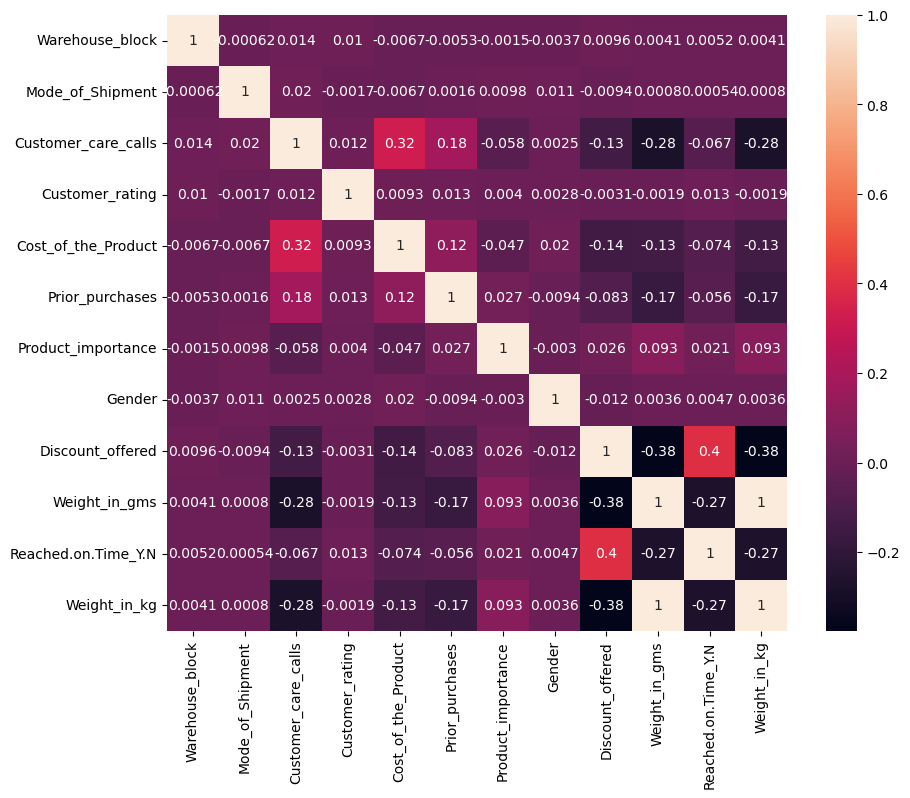

In [1252]:
plt.figure(figsize=(10, 8))
sns.heatmap(DF.corr(),annot = True)

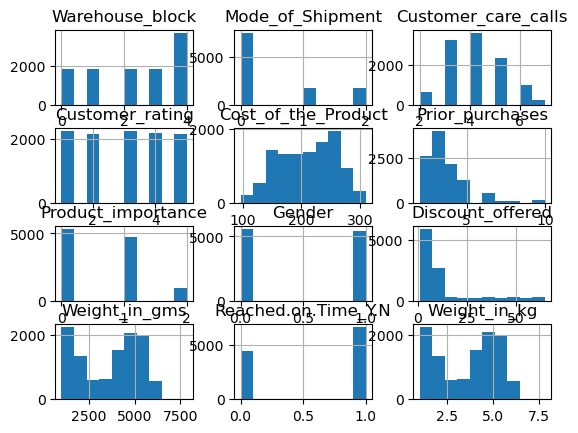

In [1253]:
DF.hist();

# Regression

In [1254]:
DF.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Weight_in_kg'],
      dtype='object')

## what we have tested on the Regression
- from sklearn.svm import SVR --> with kernals 

- from xgboost import XGBRegressor  --> very good 

- from sklearn.ensemble import GradientBoostingRegressor

- from sklearn.linear_model import ElasticNet ---> worst one yet

- from sklearn.linear_model import Lasso ---> bad

- from sklearn.linear_model import Ridge  -> huh good 

- from sklearn.neighbors import KNeighborsRegressor --> Weird

- from sklearn.ensemble import AdaBoostRegressor -> bad

- from sklearn.ensemble import ExtraTreesRegressor - >good

- from sklearn.gaussian_process import GaussianProcessRegressor -> to much Weirdness outliar 

- from sklearn.linear_model import HuberRegressor -> bad

- from sklearn.linear_model import PassiveAggressiveRegressor -> baaaaaad

- from sklearn.linear_model import OrthogonalMatchingPursuit -> baaaaaaaad

- from sklearn.linear_model import RANSACRegressor



- TEST 1 

In [1256]:
DF.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Weight_in_kg'],
      dtype='object')

In [1257]:
DF

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Weight_in_kg
0,3,2,4,2,177,3,0,0,44,1233,1,1.233
1,4,2,4,5,216,2,0,1,59,3088,1,3.088
2,0,2,2,2,183,4,0,1,48,3374,1,3.374
3,1,2,3,3,176,4,1,1,10,1177,1,1.177
4,2,2,2,2,184,3,1,0,46,2484,1,2.484
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0,0,4,1,252,5,1,0,1,1538,1,1.538
10995,1,0,4,1,232,5,1,0,6,1247,0,1.247
10996,2,0,5,4,242,5,0,0,4,1155,0,1.155
10997,4,0,5,2,223,6,1,1,2,1210,0,1.210


### Testing removing the outlier 


In [1258]:
# def findOutliers(column):
#     Q1 = np.percentile(DF[column], 25, interpolation='midpoint')
#     Q3 = np.percentile(DF[column], 75, interpolation='midpoint')
#     IQR = Q3 - Q1
#     higher_bound = Q3 + 1.5 * IQR    
#     lower_bound = Q1 - 1.5 * IQR
#     print('Lower bound outliers:', lower_bound)
#     print('Higher bound outliers:', higher_bound)
#     return higher_bound, lower_bound

# # Function to drop outliers
# def drop_outliers(max_value, min_value, name, df):
#     df = df.drop(df[(df[name] > max_value) | (df[name] < min_value)].index)
#     return df

# # Find and drop outliers for columns
# TMAX_High, TMAX_Min = findOutliers('Weight_in_gms')
# DF = drop_outliers(TMAX_High, TMAX_Min, 'Weight_in_gms', DF)
# TMIN_High, TMIN_Min = findOutliers('Cost_of_the_Product')
# DF = drop_outliers(TMIN_High, TMIN_Min, 'Cost_of_the_Product', DF)
# PRCP_High, PRCP_Min = findOutliers('Prior_purchases')
# DF = drop_outliers(PRCP_High, PRCP_Min, 'Prior_purchases', DF)


In [1259]:
import pandas as pd
from sklearn import preprocessing
# normalize the data
x = DF[[
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Discount_offered', 'Weight_in_gms','Weight_in_kg']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
DF_X = pd.DataFrame(x_scaled,columns=[
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Discount_offered', 'Weight_in_gms','Weight_in_kg'])
DF_X

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Weight_in_kg
0,0.25,0.378505,0.125,0.671875,0.033893,0.033893
1,1.00,0.560748,0.000,0.906250,0.304894,0.304894
2,0.25,0.406542,0.250,0.734375,0.346676,0.346676
3,0.50,0.373832,0.250,0.140625,0.025712,0.025712
4,0.25,0.411215,0.125,0.703125,0.216654,0.216654
...,...,...,...,...,...,...
10994,0.00,0.728972,0.375,0.000000,0.078451,0.078451
10995,0.00,0.635514,0.375,0.078125,0.035939,0.035939
10996,0.75,0.682243,0.375,0.046875,0.022498,0.022498
10997,0.25,0.593458,0.500,0.015625,0.030533,0.030533


In [14]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def predict_target_variable(target_var_name, df):
    # Encode categorical variables
    le1 = LabelEncoder()
    _arg1 = le1.fit_transform(df['Warehouse_block'])

    le2 = LabelEncoder()
    _arg2 = le2.fit_transform(df['Mode_of_Shipment'])

    le7 = LabelEncoder()
    _arg7 = le7.fit_transform(df['Product_importance'])

    le8 = LabelEncoder()
    _arg8 = le8.fit_transform(df['Gender'])

    # Ensure that there are at least 10 samples
    if len(df[target_var_name]) < 10:
        return [df[target_var_name].iloc[0]]

    X = np.column_stack((_arg1, _arg2, df['Customer_care_calls'], df['Customer_rating'], df['Cost_of_the_Product'], df['Prior_purchases'], _arg7, _arg8, df['Discount_offered'], df['Weight_in_gms']))
    y = np.array(df[target_var_name])
    nb_model = GaussianNB()

    # Reduce test size if there are fewer than 20 samples
    test_size = 0.2 if len(df[target_var_name]) >= 20 else 0.1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=13)
    nb_model.fit(X_train, y_train)
    nb_predictions = nb_model.predict(X_test)
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    # print(nb_accuracy)
    return nb_accuracy
    # return nb_model.predict(X).tolist()


In [16]:
predict_target_variable('Customer_care_calls',DF)

1.0

In [12]:

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = DF[['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']]
y = DF['Customer_care_calls']

# Train Gaussian naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X, y)

# Evaluate model performance
nb_predictions = nb_model.predict(X)
nb_accuracy = accuracy_score(y, nb_predictions)
print("Accuracy:", nb_accuracy)

Accuracy: 0.33312119283571234


In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df = pd.read_csv('Train.csv')
X = df[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']]

# Prompt user to enter target variable
target_variable = input("Enter the name of the target variable: ")
y = df['Customer_care_calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor().fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R2 score:", r2)

In [10]:
# Importing required libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Displaying the column names of the dataset
print("Column names of the dataset:\n", DF.columns)

# Asking the user to choose the target variable
target_var = input("Enter the name of the target variable: ")

# Splitting the dataset into features and target variable
X = DF.drop(columns=['Customer_care_calls'])
y = DF['Customer_care_calls']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a GaussianNB object and fitting it to the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicting the target variable for the test data
y_pred = gnb.predict(X_test)
 

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)

In [ ]:
X = DF[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N']]
y = DF['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_) 

4.884981308350689e-14


In [13]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1261]:


from xgboost import XGBRegressor  ### very good 
model1 = XGBRegressor()
model1.fit(X_train, y_train)

predictions = model1.predict(X_test)

mae1 = mean_absolute_error(y_test, predictions)
mse1 = mean_squared_error(y_test, predictions)
rmse1 = np.sqrt(mse1)
r2_1 =r2_score(y_test, predictions)

print(f'''
     MAE: {mae1}
     MSE: {mse1}
     RMSE: {rmse1}
     R^2: {r2_1}
''')


     MAE: 0.7709383250908418
     MSE: 0.9421643132923707
     RMSE: 0.9706514891001665
     R^2: 0.2856433002773766



In [1262]:
predict1=model1.predict(X_test)
predict_rounded = np.round(predict1)
predict1

array([3.3461602, 3.4842958, 4.200513 , ..., 3.6803148, 3.7027817,
       3.785674 ], dtype=float32)

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

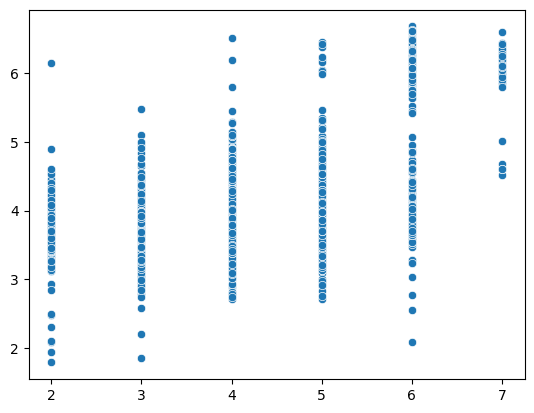

In [1263]:
sns.scatterplot(np.array(y_test),predict1)
# intercept = model1.intercept_
# plt.axhline(y=intercept, color='red', linestyle='--', label='Intercept')
# plt.show()

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



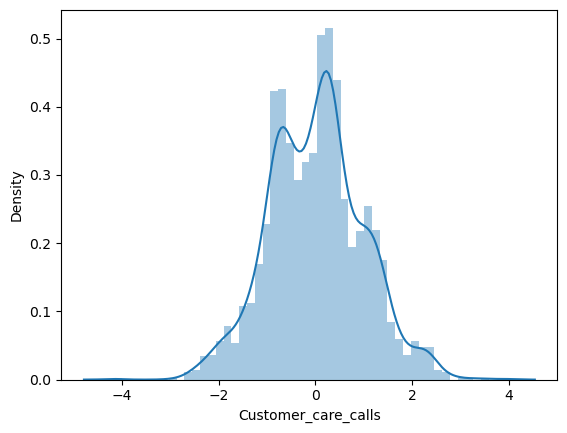

In [1264]:
sns.distplot((y_test-model1.predict(X_test)),bins=50);

In [1265]:
real=np.array(y_test)
real

array([3, 3, 4, ..., 4, 5, 4])

In [1266]:
DF.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Weight_in_kg'],
      dtype='object')

# TEST 2 

### from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [1267]:
X = DF[['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']]
y = DF['Customer_care_calls']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)

mae2 = mean_absolute_error(y_test, predictions)
mse2 = mean_squared_error(y_test, predictions)
rmse2 = np.sqrt(mse2)
r2_2 =r2_score(y_test, predictions)


print(f'''
     MAE: {mae2}
     MSE: {mse2}
     RMSE: {rmse2}
     R^2: {r2_2}
''')
sns.distplot((y_test-model2.predict(X_test)),bins=50)


     MAE: 0.7652818181818182
     MSE: 0.9270229999999999
     RMSE: 0.9628203363037156
     R^2: 0.29712356804002094



/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

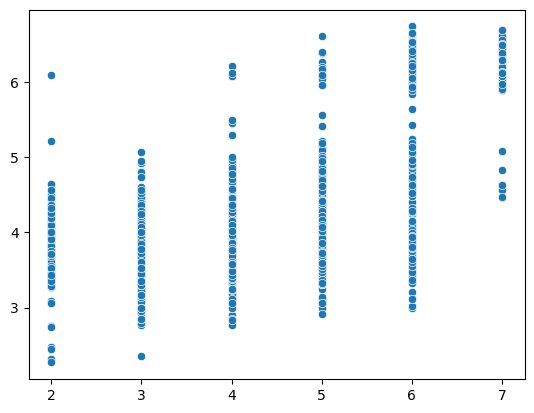

In [1268]:
sns.scatterplot(np.array(y_test),model2.predict(X_test)
)

In [1269]:
predict=model2.predict(X_test)
predict_rounded = np.round(predict)

# predict_rounded

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



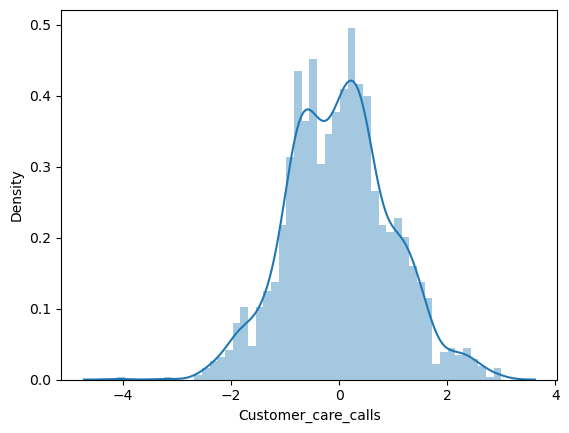

In [1270]:
sns.distplot((y_test-model2.predict(X_test)),bins=50);

In [1271]:
real

array([3, 3, 4, ..., 4, 5, 4])

# TEST 3 

In [1273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
# model3 = GradientBoostingRegressor()
from sklearn.ensemble import ExtraTreesRegressor # good
model3 = ExtraTreesRegressor()

model3.fit(X_train, y_train)
predictions = model3.predict(X_test)
mae3 = mean_absolute_error(y_test, predictions)
mse3 = mean_squared_error(y_test, predictions)
rmse3 = np.sqrt(mse3)
r2_3 =r2_score(y_test, predictions)

print(f'''
     MAE: {mae3}
     MSE: {mse3}
     RMSE: {rmse3}
     R^2: {r2_3}
''')


     MAE: 0.7732681818181817
     MSE: 0.955451409090909
     RMSE: 0.9774719479815822
     R^2: 0.27556891540668094



In [1274]:
model3.predict(X_test)

array([3.88, 4.46, 4.21, ..., 3.66, 3.47, 3.7 ])

In [1275]:
real

array([3, 3, 4, ..., 4, 5, 4])

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

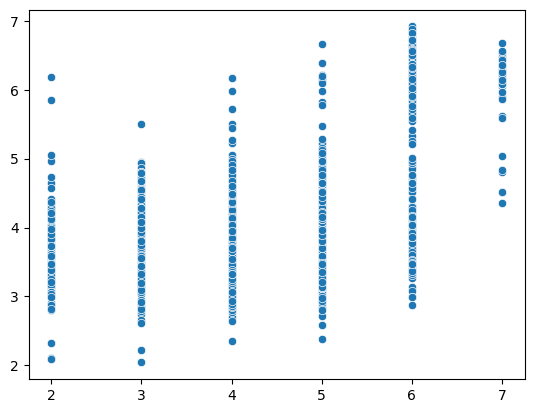

In [1276]:
sns.scatterplot(np.array(y_test),model3.predict(X_test)
)

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



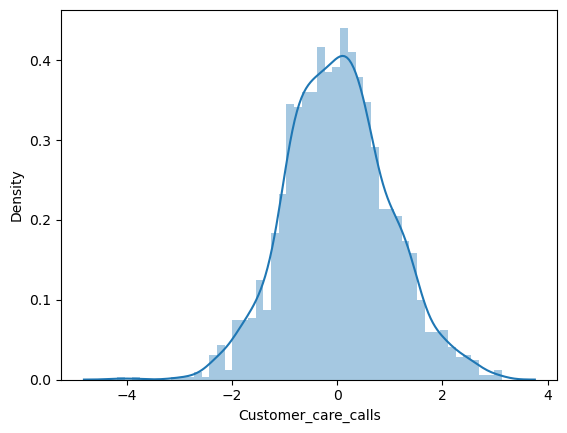

In [1277]:
sns.distplot((y_test-model3.predict(X_test)),bins=50);

In [1278]:
predict=model3.predict(X_test)
predict


array([3.88, 4.46, 4.21, ..., 3.66, 3.47, 3.7 ])

In [1279]:
real=np.array(y_test)
print(real)

[3 3 4 ... 4 5 4]


# RESULTS

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fu

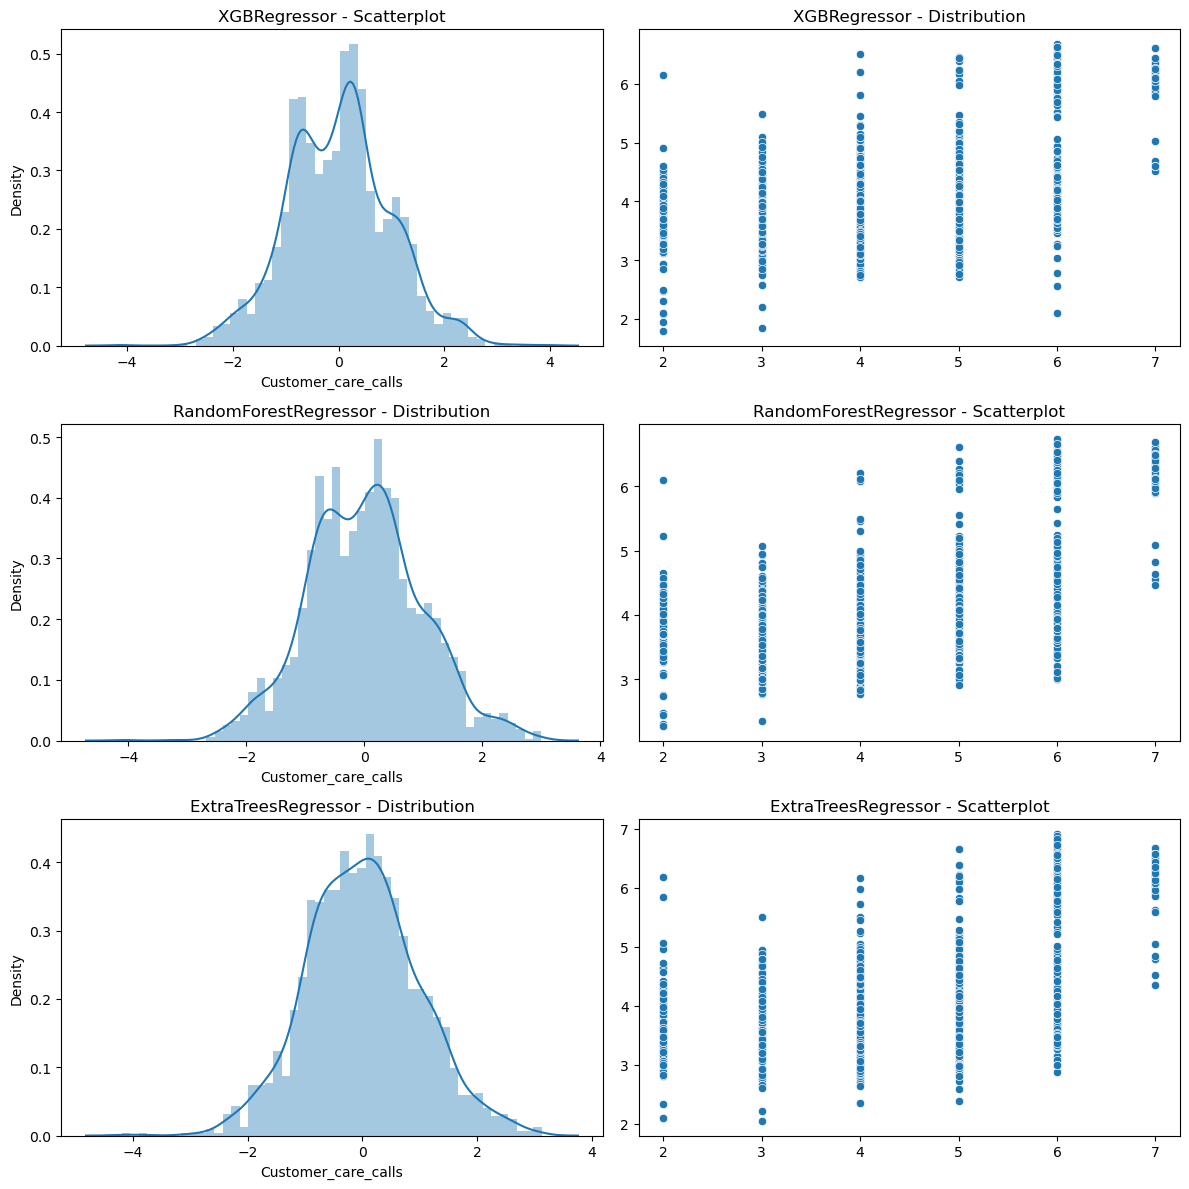

,Model,mean absolute error,mean_squared_error,Root Mean Square Error,R^2
0,XGBRegressor,0.770938,0.942164,0.970651,0.285643
1,RandomForestRegressor,0.765282,0.927023,0.962820,0.297124
2,ExtraTreesRegressor,0.773268,0.955451,0.977472,0.275569


In [1296]:
evaluations_Regression = pd.DataFrame({'Model':['XGBRegressor', 'RandomForestRegressor', 'ExtraTreesRegressor'],
    'mean absolute error':[mae1,mae2,mae3],
    'mean_squared_error':[mse1,mse2,mse3],                      
    'Root Mean Square Error ':[rmse1,rmse2,rmse3],
    'R^2':[r2_1,r2_2,r2_3]}
                     )

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# XGBRegressor
sns.scatterplot(np.array(y_test), model1.predict(X_test), ax=axes[0, 1])
sns.distplot((y_test - model1.predict(X_test)), bins=50, ax=axes[0, 0])

# RandomForestRegressor
sns.distplot((y_test - model2.predict(X_test)), bins=50, ax=axes[1, 0])
sns.scatterplot(np.array(y_test), model2.predict(X_test), ax=axes[1, 1])

# ExtraTreesRegressor
sns.distplot((y_test - model3.predict(X_test)), bins=50, ax=axes[2, 0])
sns.scatterplot(np.array(y_test), model3.predict(X_test), ax=axes[2, 1])

axes[0, 0].set_title('XGBRegressor - Scatterplot')
axes[0, 1].set_title('XGBRegressor - Distribution')
axes[1, 0].set_title('RandomForestRegressor - Distribution')
axes[1, 1].set_title('RandomForestRegressor - Scatterplot')
axes[2, 0].set_title('ExtraTreesRegressor - Distribution')
axes[2, 1].set_title('ExtraTreesRegressor - Scatterplot')
plt.tight_layout()
plt.show()
evaluations_Regression


| Model                  | Mean Absolute Error (MAE) | Mean Squared Error (MSE) | Root Mean Square Error (RMSE) | R^2 Score |
|------------------------|--------------------------|-------------------------|-------------------------------|-----------|
| XGBRegressor           | 0.770938                 | 0.942164                | 0.970651                      | 0.285643  |
| RandomForestRegressor | 0.765282                 | 0.927023                | 0.962820                      | 0.297124  |
| ExtraTreesRegressor    | 0.773268                 | 0.955451                | 0.977472                      | 0.275569  |

### In summary
 all three models have similar performance, but RandomForestRegressor performs slightly better than XGBRegressor and ExtraTreesRegressor in terms of MAE, MSE, RMSE, and R^2 score. However, the differences between the models are relatively small


# classification 

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = DF_X[[
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Discount_offered', 'Weight_in_kg']]
y = DF['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
confusion_mat = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{confusion_mat}')

Accuracy: 0.6554545454545454
Confusion Matrix:
[[560 339]
 [419 882]]


In [ ]:
predictions

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

2821    1
4999    0
334     1
5597    1
8880    1
       ..
2301    1
4736    0
4926    0
1928    1
6673    1
Name: Reached.on.Time_Y.N, Length: 2200, dtype: int64